# Benford's law on Wikipedia - conclusions

The first digits of the numbers should be as follows: <br>
1 -	30,1% <br>
2 -	17,6% <br>
3 -	12,5% <br>
4 -	9,7% <br>
5 -	7,9% <br>
6 -	6,7% <br>
7 -	5,8% <br>
8 -	5,1% <br>
9 -	4,6% <br>
Source: https://en.wikipedia.org/wiki/Benford%27s_law

In [1]:
Sys.setenv(`_R_S3_METHOD_REGISTRATION_NOTE_OVERWRITES_` = "false")
library(ggplot2)
results <- c(4420210, 3557172, 670684, 489412, 433756, 298948, 289331, 272232, 292527)

df <- data.frame(digit = as.factor(1:9), count_wiki = results)
sum <- sum(df$count_wiki)
df$count_wiki <- 100*df$count_wiki/sum

print(df)

  digit count_wiki
1     1  41.216877
2     2  33.169356
3     3   6.253888
4     4   4.563592
5     5   4.044620
6     6   2.787583
7     7   2.697908
8     8   2.538466
9     9   2.727710


The numbers were taken from Wikipedia, where there are often dates (years). So naturally the numbers 1 and 2 will appear more often in the first position than Benford's law states. Let's get rid of them and check if the distribution is good for numbers 3-9. 

### Distribution of digits 3-9

In [2]:
# wikipedia data
results_benford <- c(12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6)
results_benford <- 100*results_benford/sum(results_benford)
print(results_benford)

[1] 23.900574 18.546845 15.105163 12.810707 11.089866  9.751434  8.795411


  digit count_wiki count_benford
3     3  24.416122     23.900574
4     4  17.816949     18.546845
5     5  15.790803     15.105163
6     6  10.883144     12.810707
7     7  10.533039     11.089866
8     8   9.910553      9.751434
9     9  10.649389      8.795411


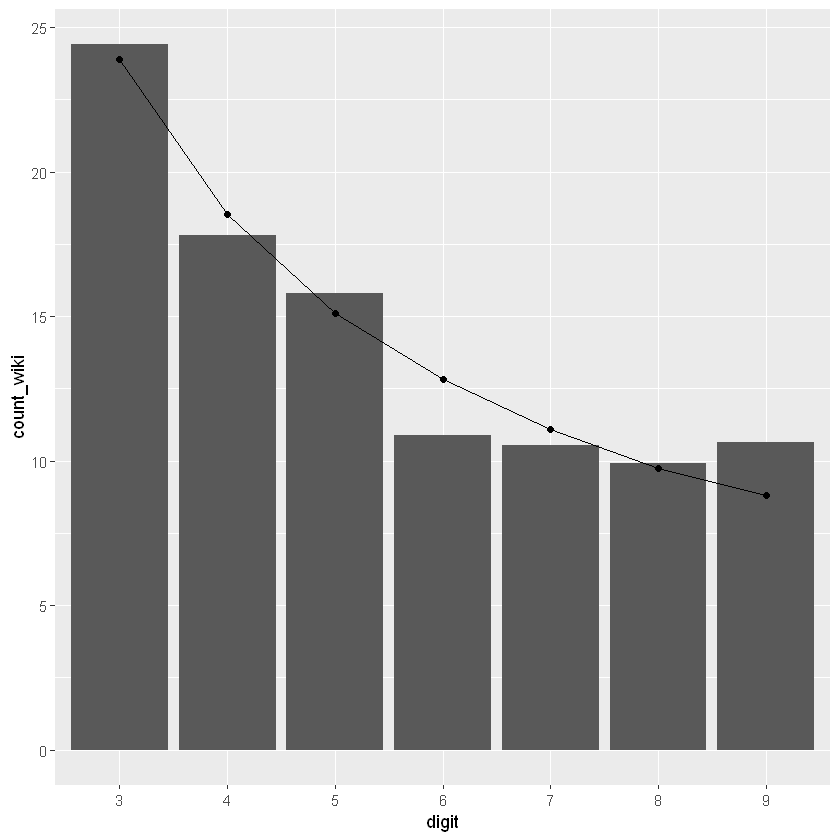

In [3]:
df <- df[3:9,]
sum <- sum(df$count_wiki)
df$count_wiki <- 100*df$count_wiki/sum
df$count_benford <- results_benford

print(df)

ggplot() +
    geom_col(aes(digit, count_wiki), df) +
    geom_point(aes(digit, count_benford), df) +
    geom_line(aes(digit, count_benford), group = 1, df)

line - Benford's Law <br>
bars - first digits of random numbers from Wikipedia <br>

## Conclusions

The distribution of numbers 3-9 only slightly resembles that of Benfor's law. Significant differences can be seen with the numbers 6 and 9. The numbers 6-9 occur with almost the same frequency. 